In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

sns.set(style='white', rc={'figure.figsize':[30, 10]})
%matplotlib inline

# 1. Datenimport

In [2]:
df = pd.read_csv('data/candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## 1.1 Datenüberblick

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
print(f"Anzahl fehlender Werte je Spalte:\n{df.isnull().sum()}")

Anzahl fehlender Werte je Spalte:
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [5]:
print(f"Anzahl Zeilen: {df.shape[0]}\nAnzahl Spalten: {df.shape[1]}")

Anzahl Zeilen: 85
Anzahl Spalten: 13


In [6]:
df['sugarpercent'] = 100 * df['sugarpercent'] # Dezimalzahl in Prozent
df['pricepercent'] = 100 * df['pricepercent'] # Dezimalzahl in Prozent

stats = df.describe().transpose()
stats = stats.rename({"count":"rows"},axis=1)
stats

,rows,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.000000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.000000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.000000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.000000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.000000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.000000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.000000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.000000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.000000
sugarpercent,85.0,47.864705,28.277787,1.100000,22.000000,46.500000,73.199999,98.799998


> $\Rightarrow$ 
> - Es ist **kein Umgang mit fehlenden Werten** im Datensatz notwendig
> - Es ist **keine Konvertierung von Spalten-Datentypen** notwendig
> - Bspw. liegt der **größte Gewinnprozent bei *84%***, der **kleinste bei *22%*** und im **durchschnitt bei *50%***

# 2. Deskription und Exploration der Datengrundlage

## 2.1 Übersicht der Süßwaren sortiert nach Gewinnprozent

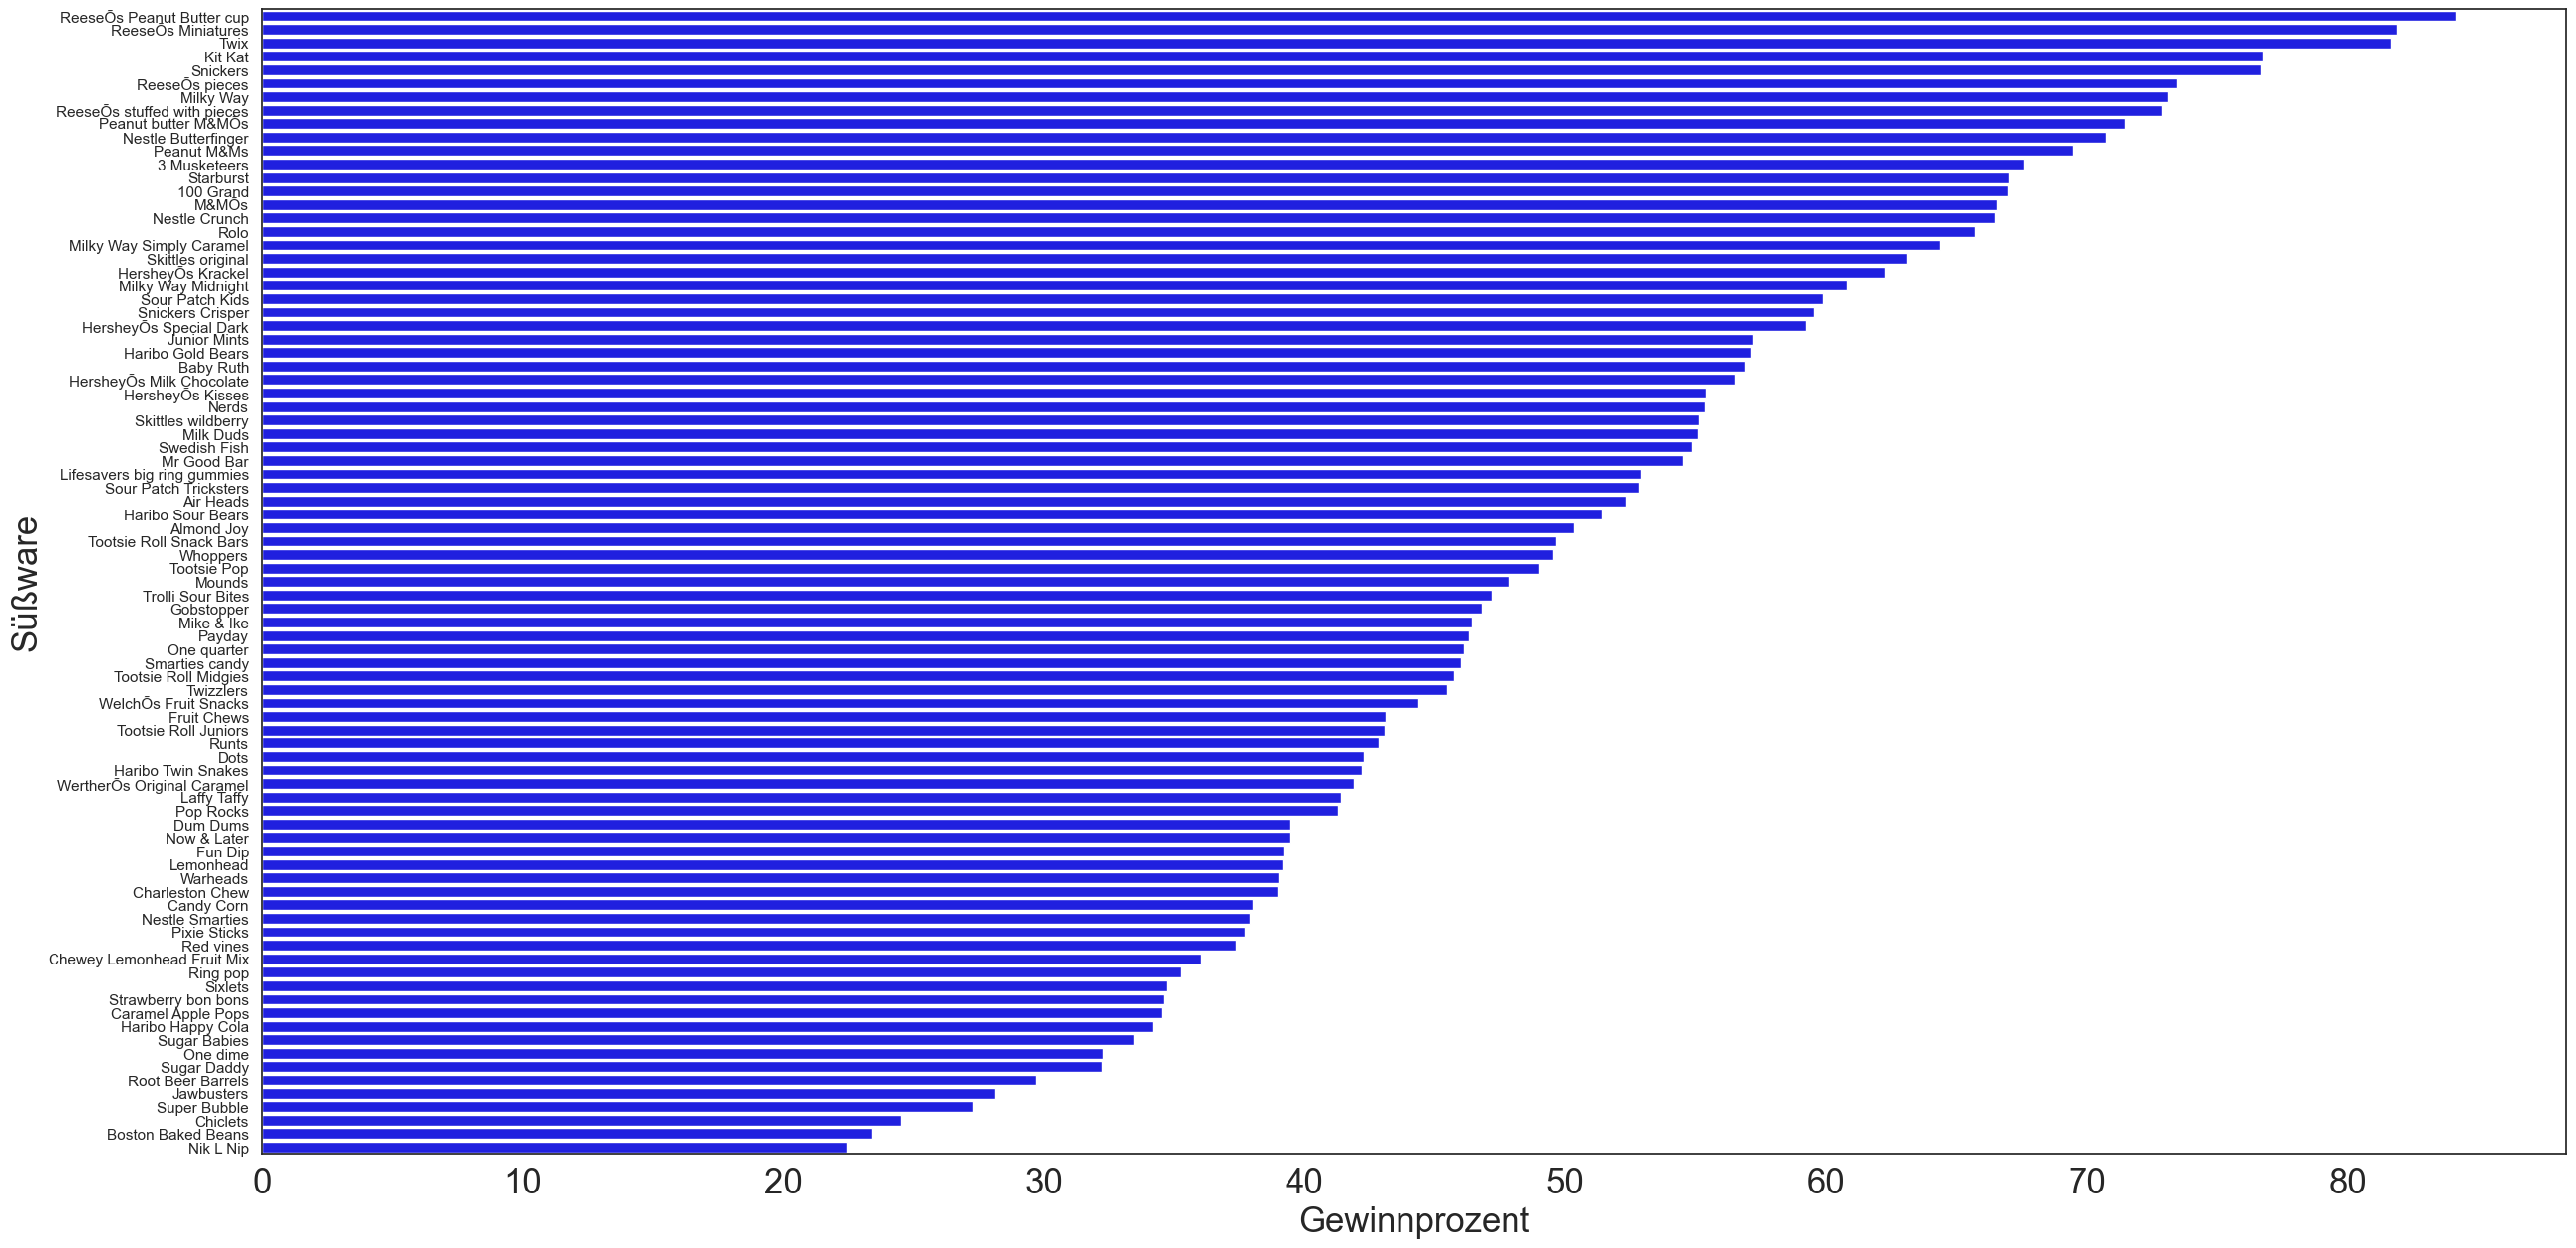

In [7]:
df = df.sort_values(by='winpercent', ascending=False)
df = df.reset_index(drop=True)

taste_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']
taste_leg = ["Schokolade", "Frucht", "Karamell", "Nuss", "Nougat", "Keks / Reiswaffeln"]
taste_color = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

shape_cols = ['hard', 'bar', 'pluribus']
shape_leg = ["Fest / Bonbon", "Riegel", "Tüte / Schachtel"]
shape_color = ['gray', 'hotpink',  'olive']

bins = list(range(0, 100, 10))

fig, ax = plt.subplots(figsize=[30, 15])
sns.barplot(data=df,  y='competitorname', x='winpercent', orient='h', color=taste_color[0], ax=ax)
ax.set_xlabel("Gewinnprozent", fontsize=25)
ax.set_ylabel("Süßware", fontsize=25)
plt.xticks(fontsize=25)
plt.show()

> $\Rightarrow$ Die **Top 3 Süßwaren** sind:
> 1. Platz **Reese's Peanut Butter cup** (84,2% Gewinnprozent)
> 2. Platz **Reese's Miniatures** (81,9% Gewinnprozent)
> 3. Platz **Twix** (81,6% Gewinnprozent)

## 2.2 Korrelations -und Regressionsanalyse

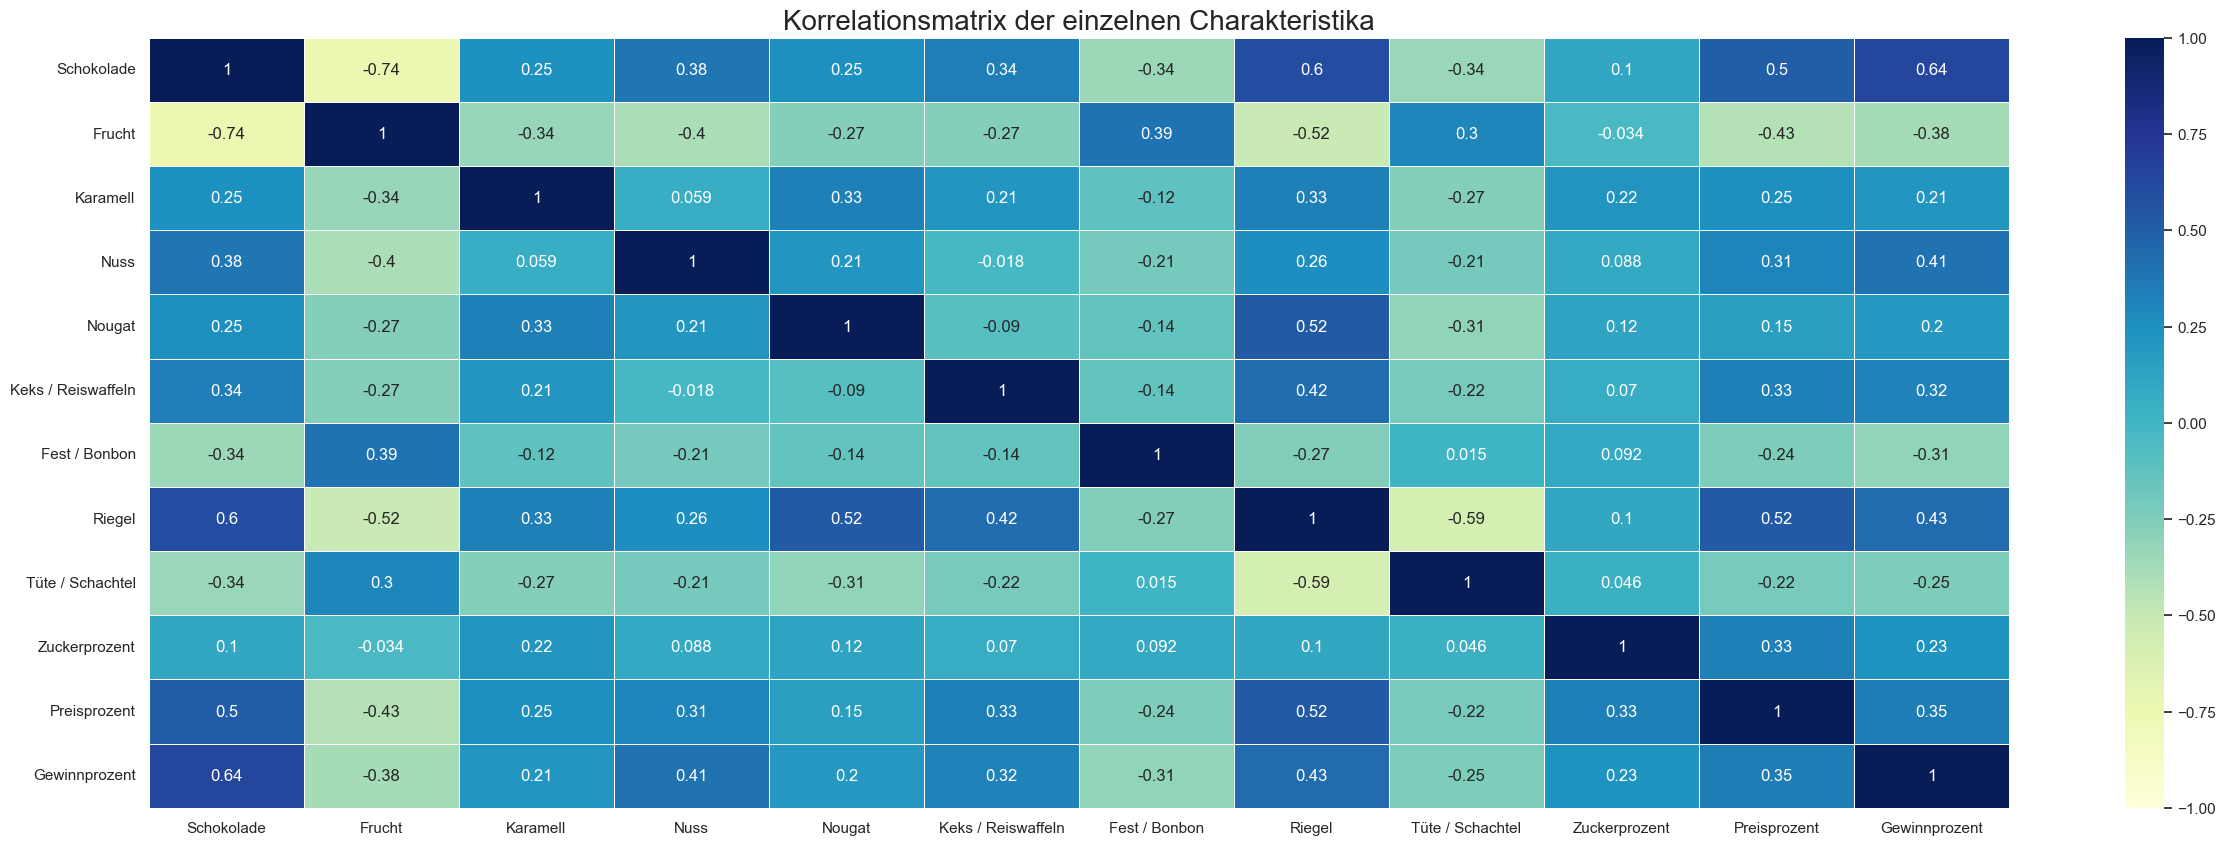

In [8]:
df_corr = df.corr(method='pearson', numeric_only=True)

heatmap_leg = taste_leg + shape_leg + ["Zuckerprozent", "Preisprozent", "Gewinnprozent"]
sns.heatmap(data=df_corr, annot=True, vmin=-1, vmax=1, linewidths=.5, xticklabels=heatmap_leg, yticklabels=heatmap_leg, cmap='YlGnBu')
plt.title("Korrelationsmatrix der einzelnen Charakteristika", fontsize=20)
plt.savefig('korrelation.png', bbox_inches='tight')

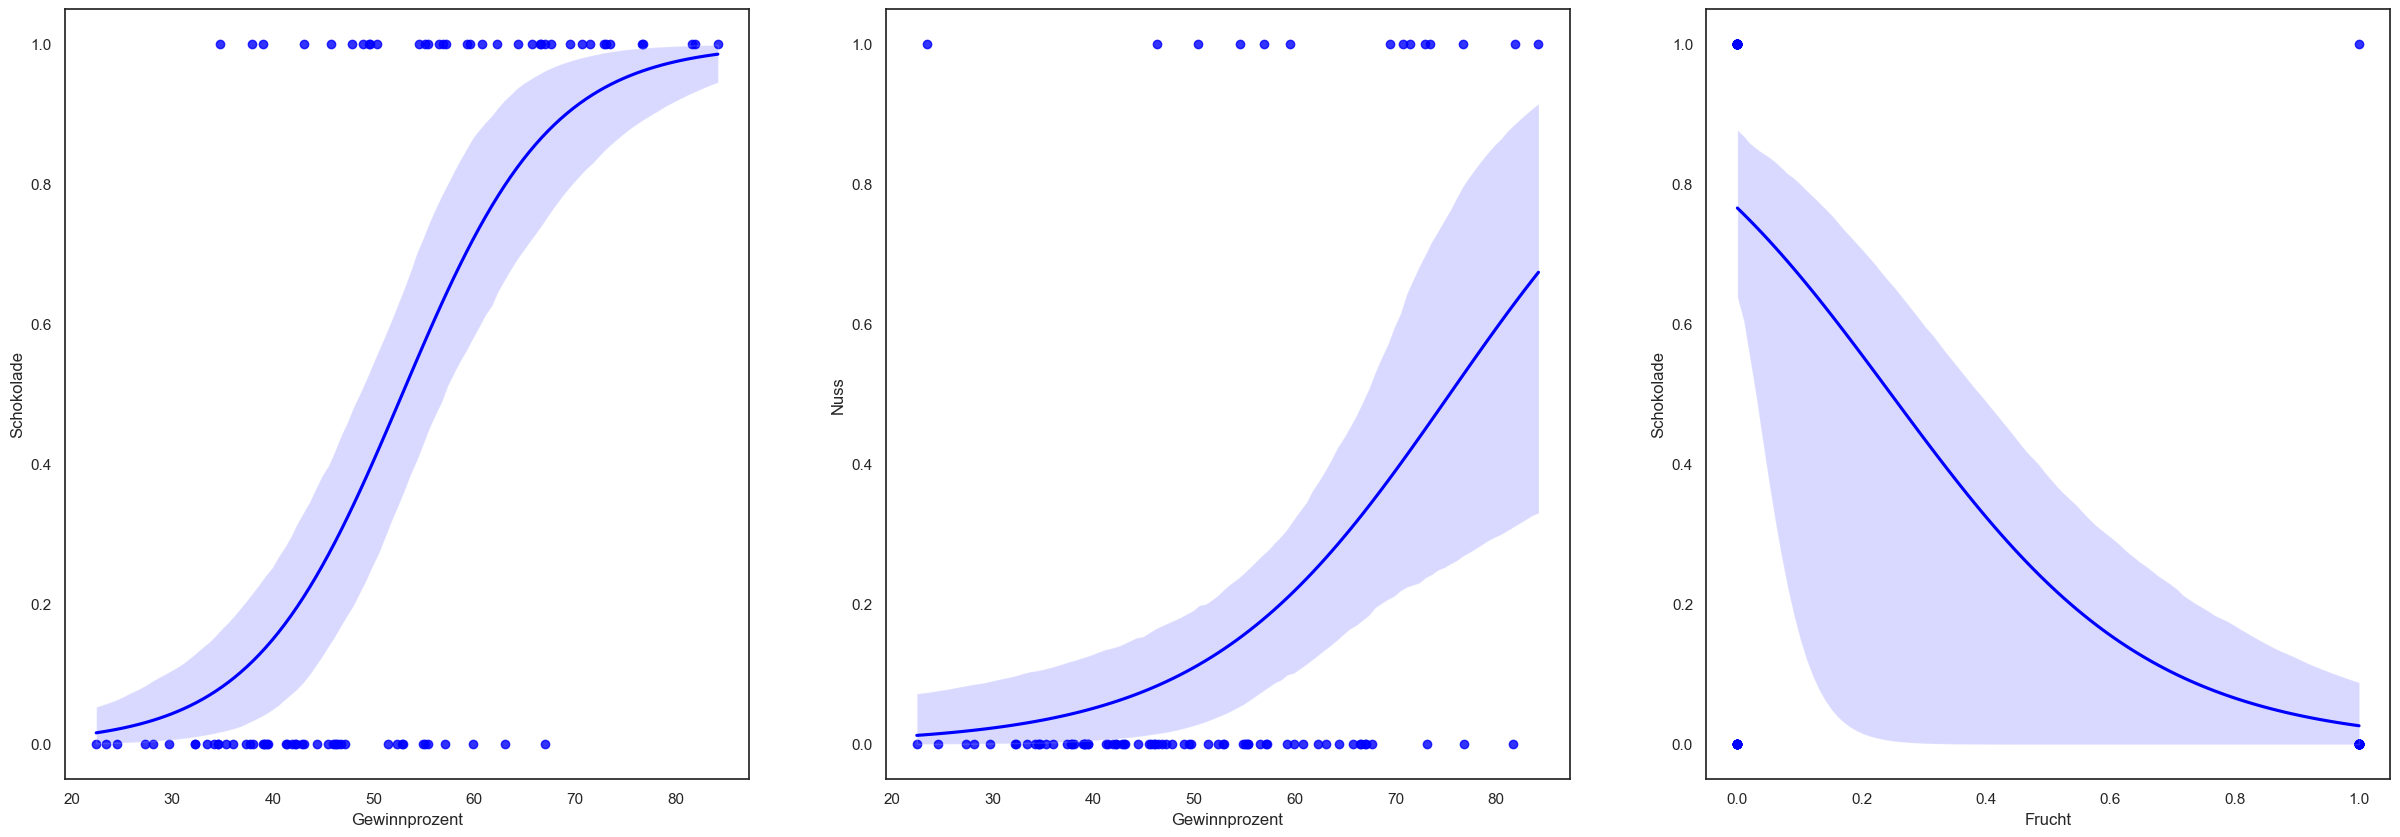

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.regplot(x='winpercent', y="chocolate", data=df, logistic=True, ax=ax1, color=taste_color[0])
sns.regplot(x='winpercent', y="peanutyalmondy", data=df, logistic=True, ax=ax2, color=taste_color[0])
sns.regplot(x='fruity', y="chocolate", data=df, logistic=True, ax=ax3, color=taste_color[0])

ax1.set_xlabel(heatmap_leg[11])
ax1.set_ylabel(taste_leg[0])

ax2.set_xlabel(heatmap_leg[11])
ax2.set_ylabel(taste_leg[3])

ax3.set_xlabel(taste_leg[1])
ax3.set_ylabel(taste_leg[0])

plt.show()

> $\Rightarrow$
> - Offensichtlich existiert eine signifikante **positive Korrelation zwischen Schokolade und Gewinnprozent**.
> - Außerdem **positiv korreliert** mit gleicher Vermutung sind **Nuss und Gewinnprozent sowie Riegel und Gewinnprozent**. 
> - Offensichtlich Signifikant **negativ korreliert sind Schokolade und Frucht**.

## 2.3 Inhaltsanalyse der Süßigkeiten sortiert nach Platzierung der Beliebtheit

### 2.3.1 Einzeln

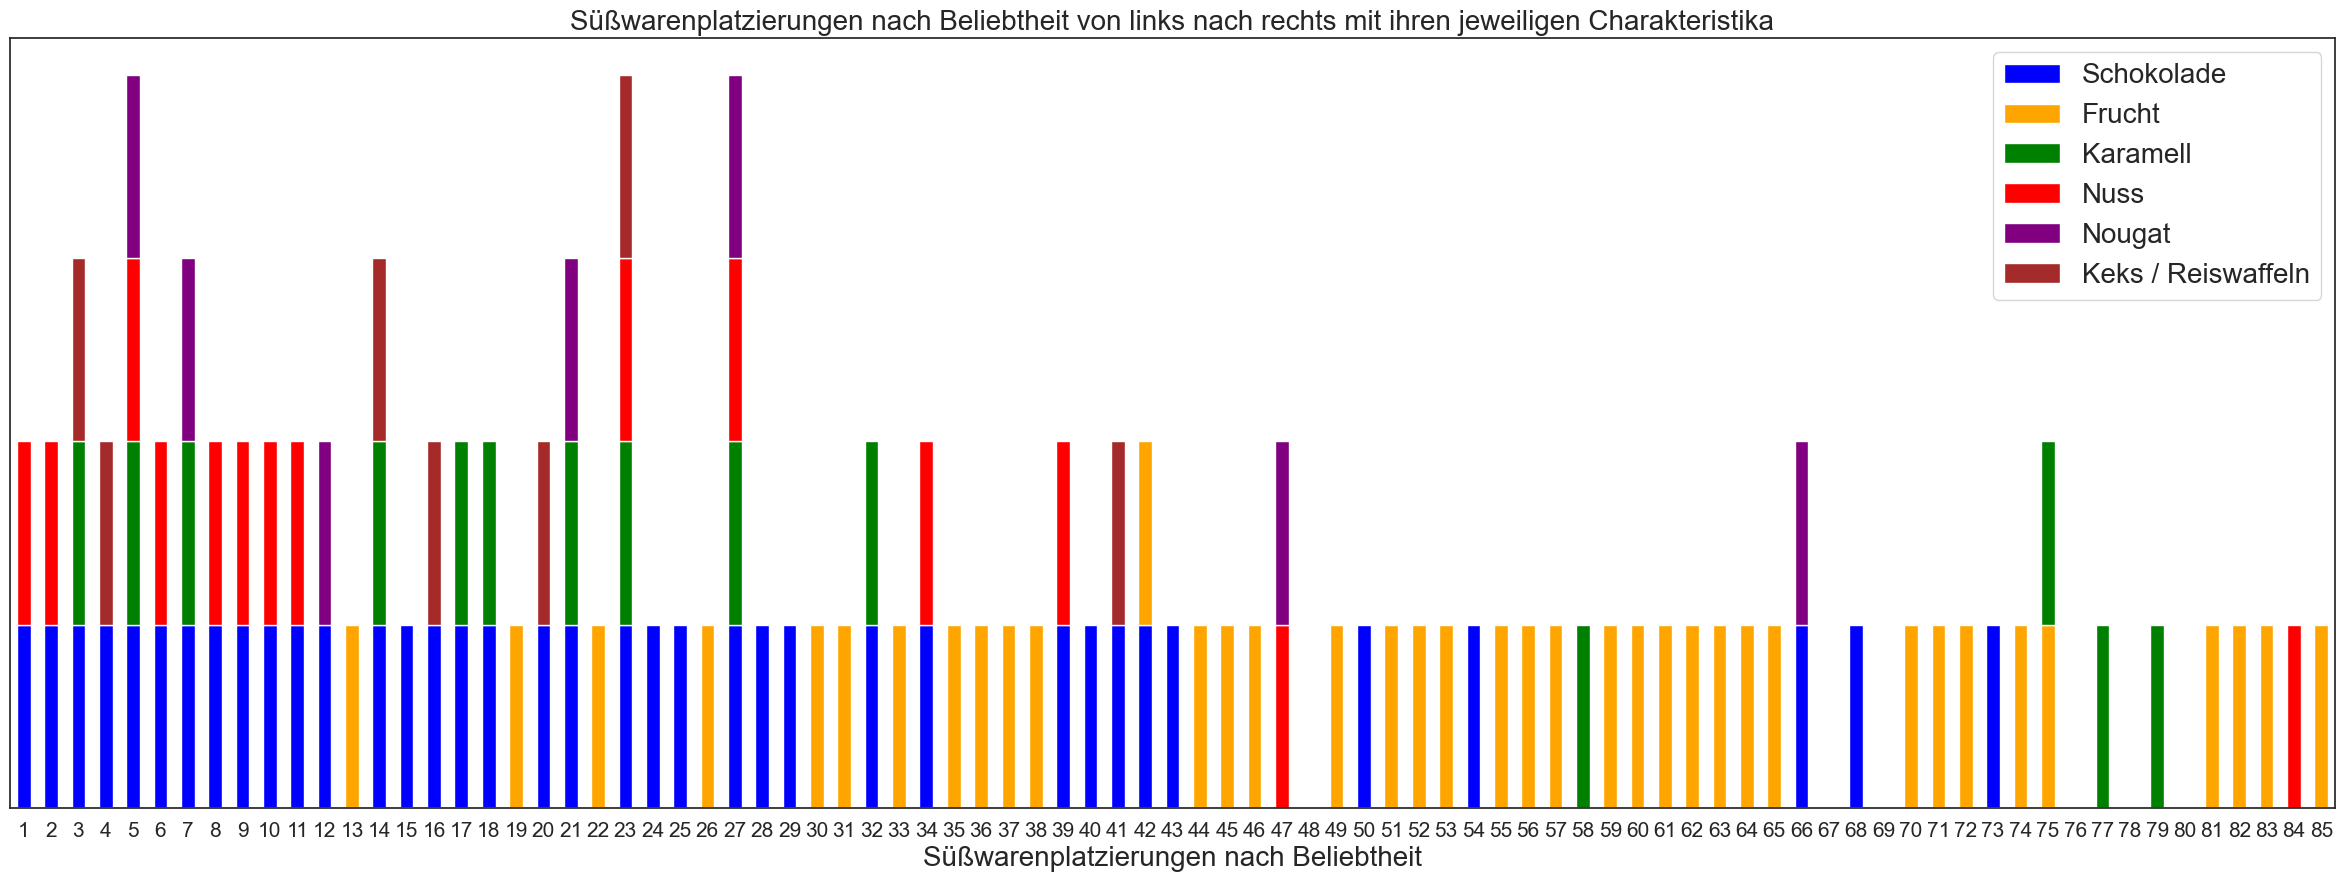

In [10]:
df['ranking'] = range(1, df.shape[0] +1) # Spalte mit der Platzierung hinzufügen

drop_cols = shape_cols + ['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']
df_taste = df.drop(drop_cols, axis=1)

df_taste.plot(kind='bar', x='ranking', stacked=True, color=taste_color, fontsize=15)
plt.xticks(rotation=0)
plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=20)
plt.yticks([])
plt.title("Süßwarenplatzierungen nach Beliebtheit von links nach rechts mit ihren jeweiligen Charakteristika", fontsize=20)
plt.legend(taste_leg, fontsize=20)
plt.show()

### 2.3.2 In Gruppen

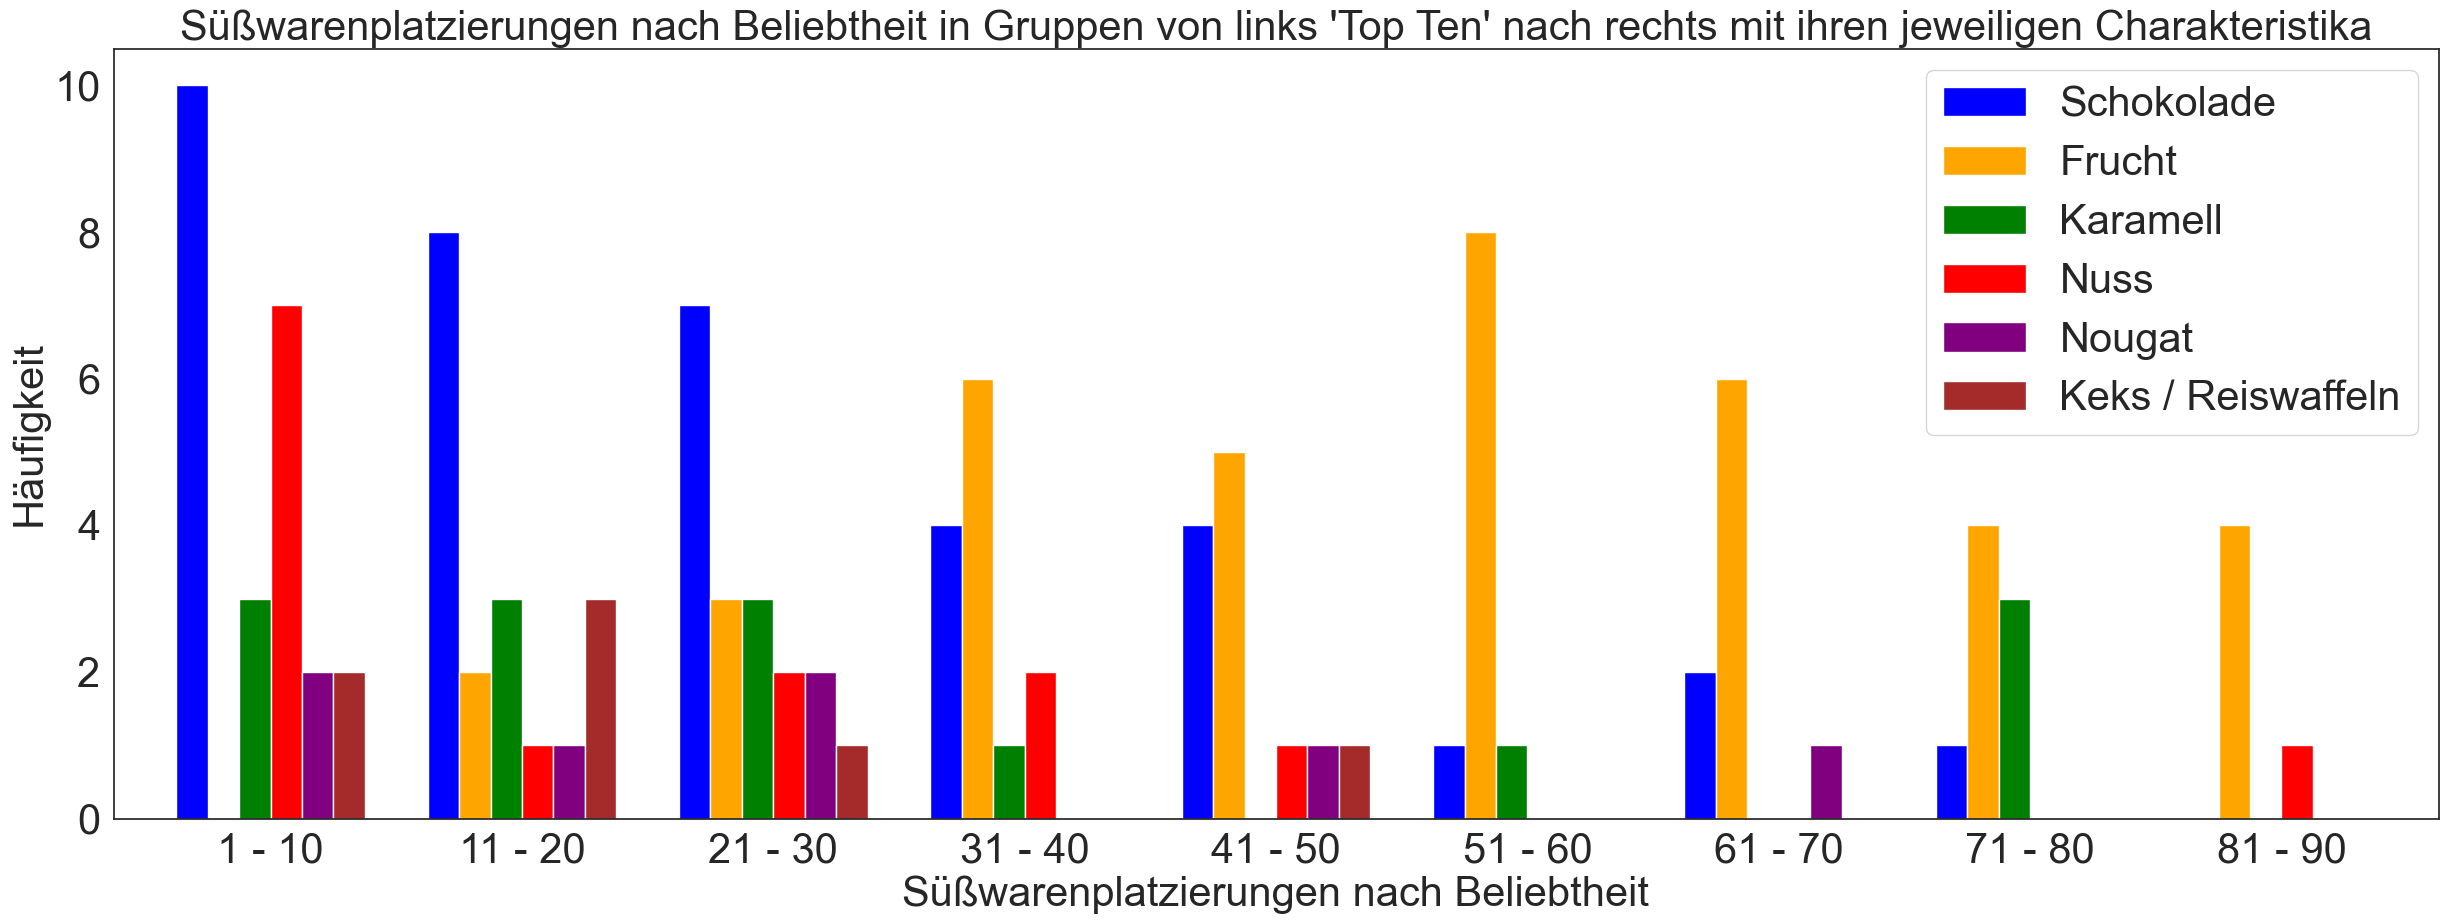

In [11]:
xticks = ["1 - 10", "11 - 20", "21 - 30", "31 - 40", "41 - 50", "51 - 60", "61 - 70", "71 - 80", "81 - 90"]
df_taste_grouped = df_taste.groupby(pd.cut(df_taste['ranking'], bins)).sum()
df_taste_grouped = df_taste_grouped.drop(['ranking'], axis=1)

df_taste_grouped.plot(kind='bar', color=taste_color, width = 0.75)
plt.xticks(range(0,9), xticks, rotation=0, fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel("Häufigkeit", fontsize=30)
plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=30)
plt.title("Süßwarenplatzierungen nach Beliebtheit in Gruppen von links 'Top Ten' nach rechts mit ihren jeweiligen Charakteristika", fontsize=30)
plt.legend(taste_leg, fontsize=30) #ncol=6, bbox_to_anchor=[.983,1.125]
plt.savefig('summary1.png', bbox_inches='tight')

### 2.3.3 In Gruppen pro Charakteristik

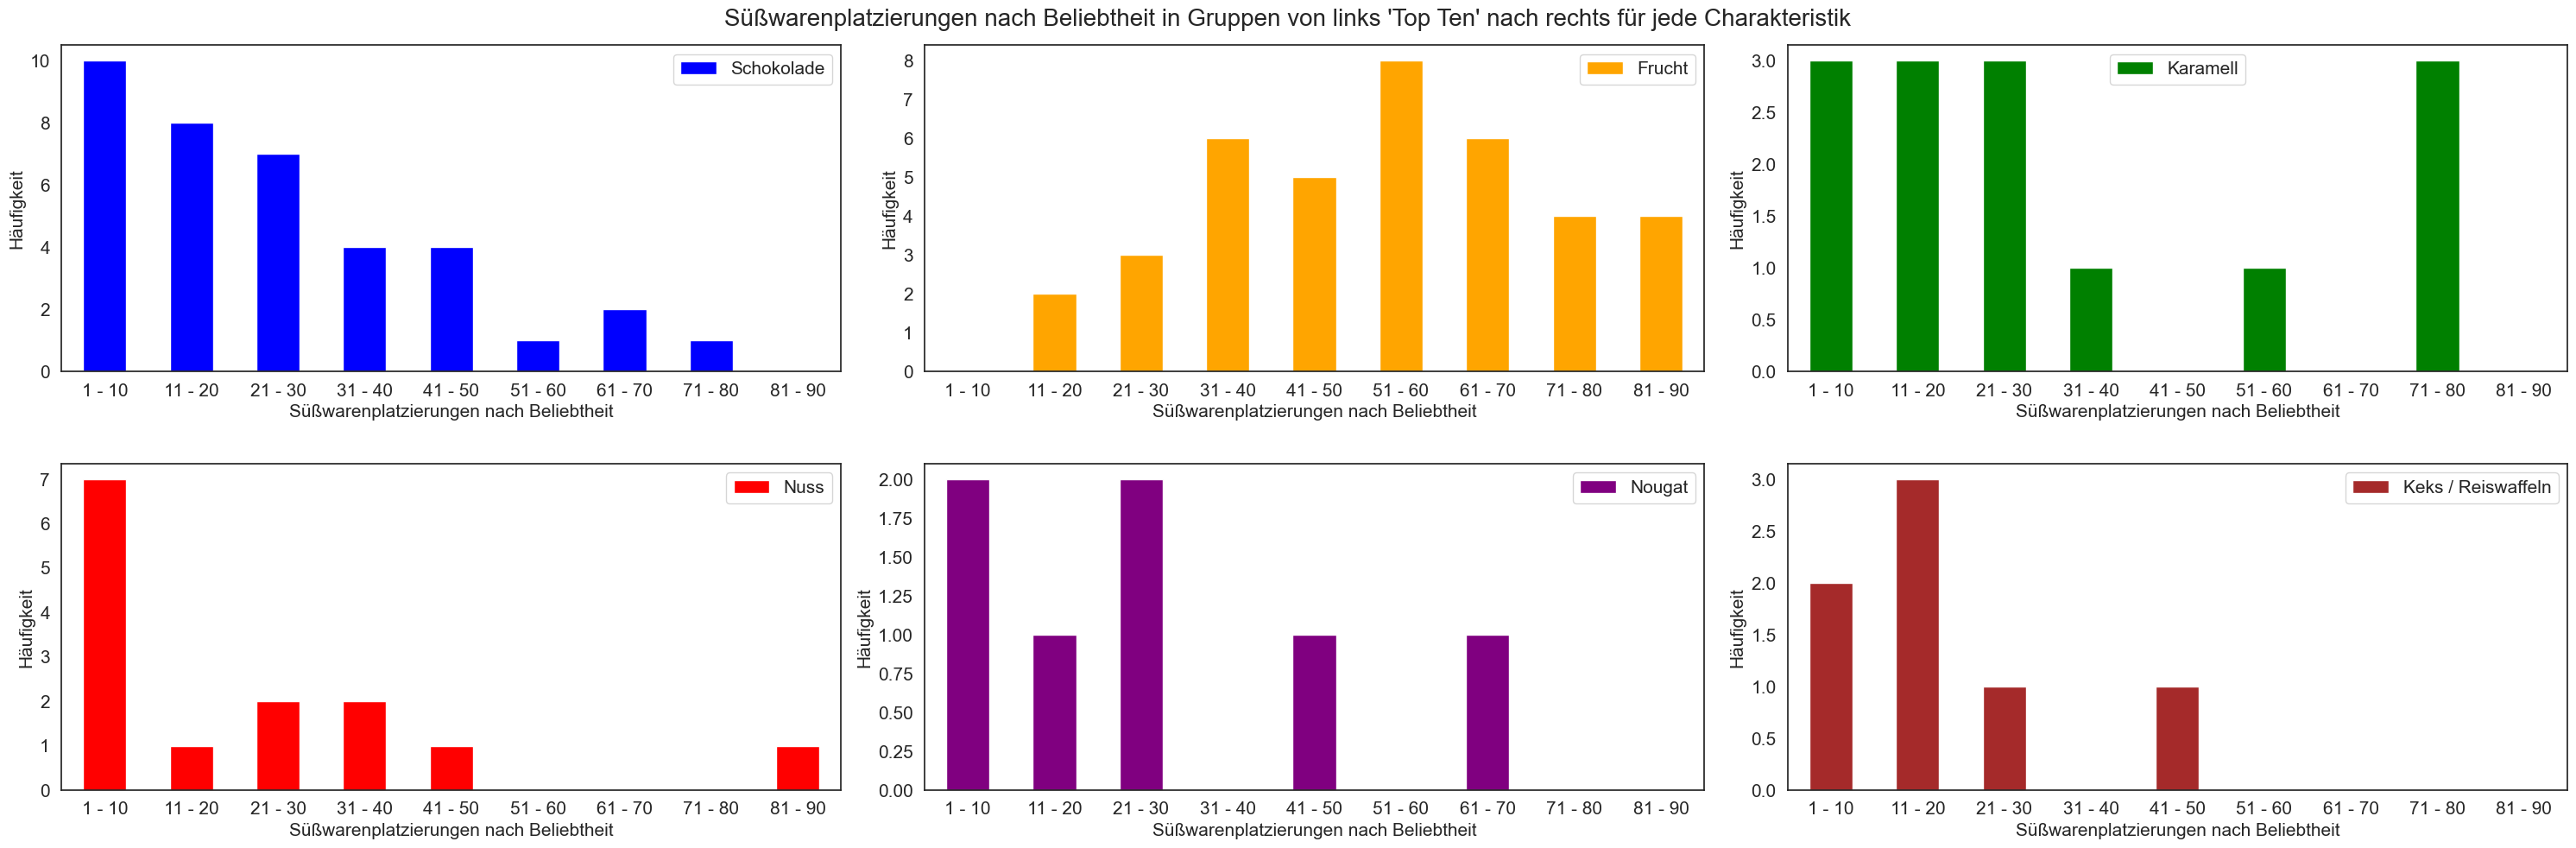

In [12]:
fig = plt.gcf()
fig.suptitle("Süßwarenplatzierungen nach Beliebtheit in Gruppen von links 'Top Ten' nach rechts für jede Charakteristik", fontsize=20)
for index, col in enumerate(taste_cols):
    ax = plt.subplot(2, 3, index+1)
    df_taste_grouped[col].plot(kind='bar', color=taste_color[index], label=taste_leg[index], fontsize=15)
    plt.xticks(range(0,9), xticks, rotation=0, fontsize=15)
    plt.ylabel("Häufigkeit", fontsize=15)
    plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=15)
    plt.legend(fontsize=15)

plt.tight_layout(h_pad=3)
plt.savefig('taste.png', bbox_inches='tight')

## 2.4 Gestaltsanalyse der Süßigkeiten sortiert nach Platzierung der Beliebtheit

### 2.4.1 Einzeln

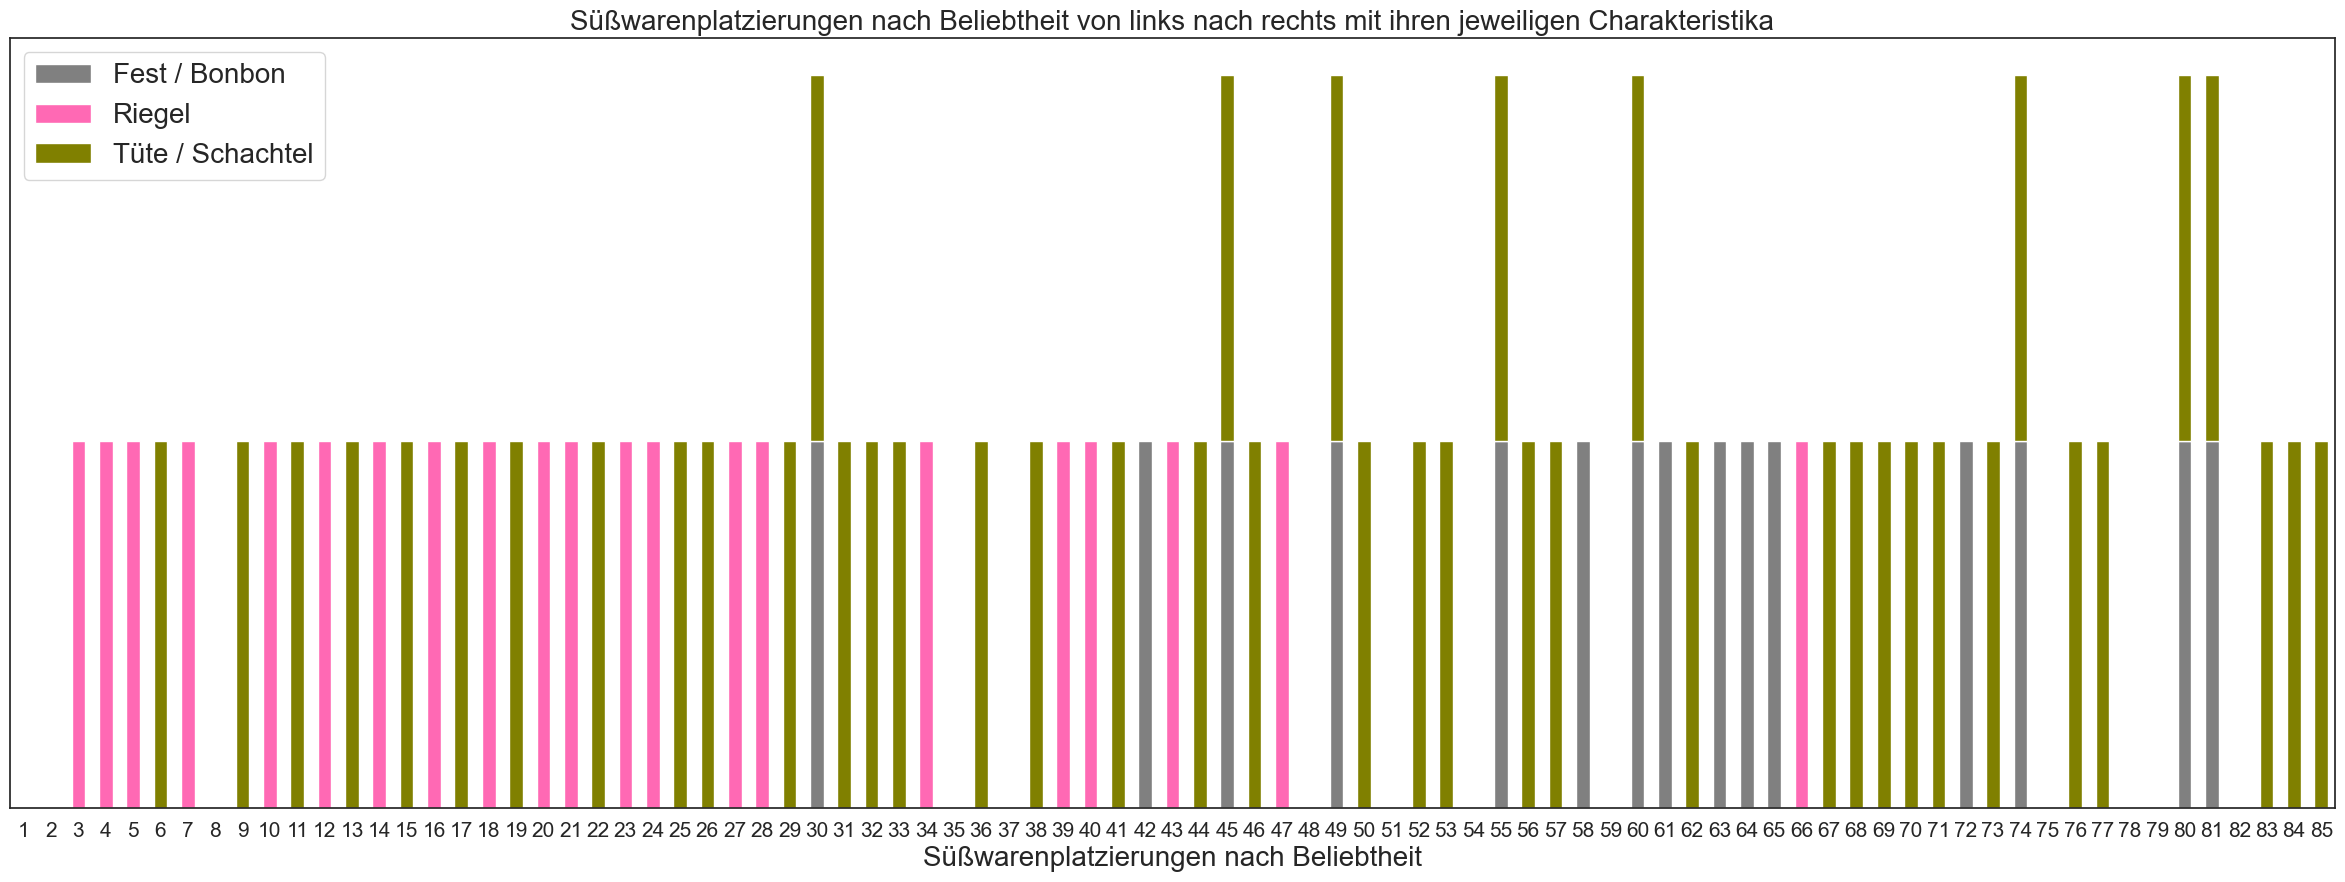

In [13]:
drop_cols = taste_cols + ['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']
df_shape = df.drop(drop_cols, axis=1)

df_shape.plot(kind='bar', x='ranking', stacked=True, color=shape_color, fontsize=15)
plt.xticks(rotation=0)
plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=20)
plt.yticks([])
plt.title("Süßwarenplatzierungen nach Beliebtheit von links nach rechts mit ihren jeweiligen Charakteristika", fontsize=20)
plt.legend(shape_leg, fontsize=20)
plt.show()

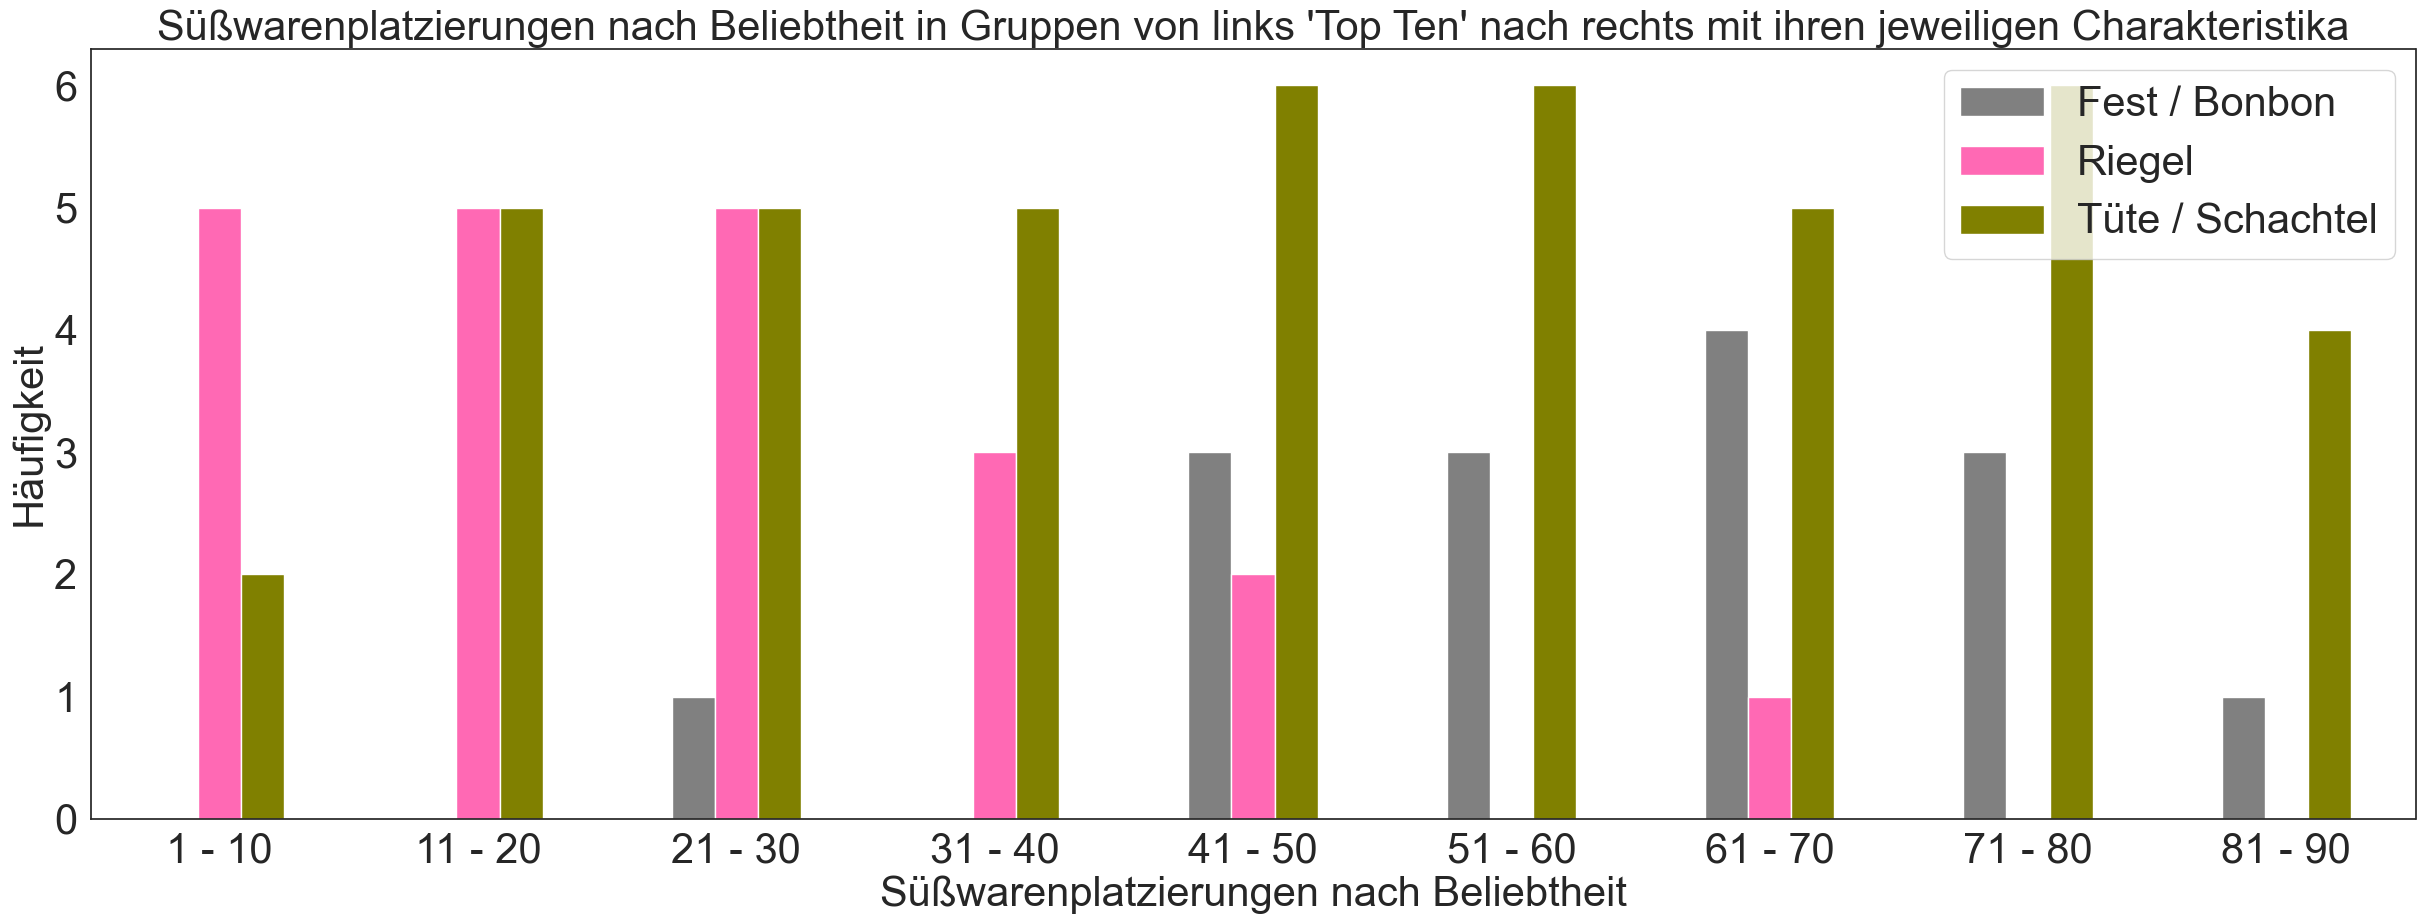

In [14]:
df_shape_grouped = df_shape.groupby(pd.cut(df_shape['ranking'], bins)).sum()
df_shape_grouped = df_shape_grouped.drop(['ranking'], axis=1)

df_shape_grouped.plot(kind='bar', color=shape_color)
plt.yticks(fontsize=30)
plt.xticks(range(0,9), xticks, rotation=0, fontsize=30)
plt.ylabel("Häufigkeit", fontsize=30)
plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=30)
plt.title("Süßwarenplatzierungen nach Beliebtheit in Gruppen von links 'Top Ten' nach rechts mit ihren jeweiligen Charakteristika", fontsize=30)
plt.legend(shape_leg, fontsize=30) #ncol=3, bbox_to_anchor=[.78,1.125]
plt.savefig('summary2.png', bbox_inches='tight')

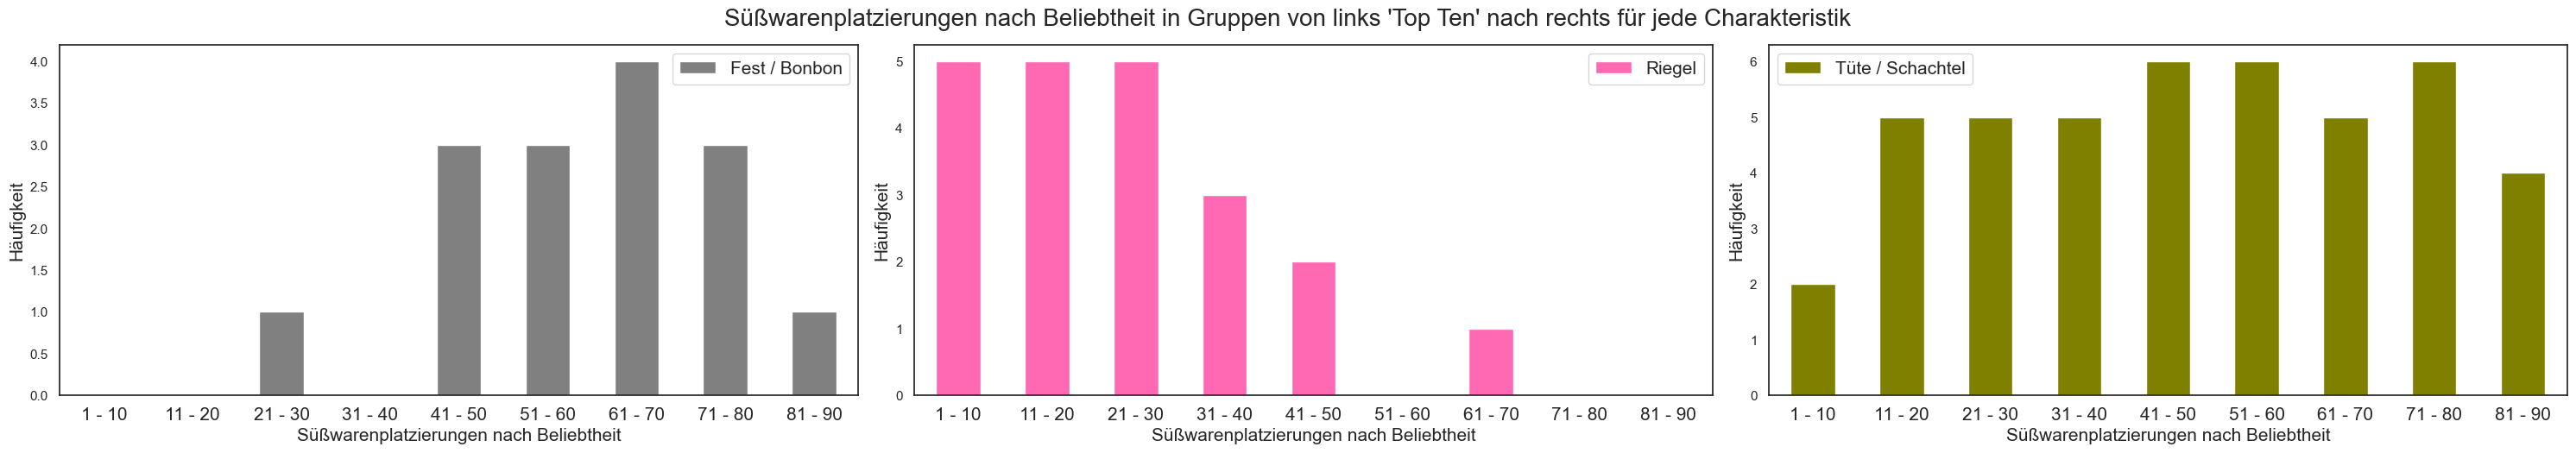

In [15]:
fig = plt.gcf()
fig.suptitle("Süßwarenplatzierungen nach Beliebtheit in Gruppen von links 'Top Ten' nach rechts für jede Charakteristik", fontsize=20)
for index, col in enumerate(shape_cols):
    ax = plt.subplot(2, 3, index+1)
    df_shape_grouped[col].plot(kind='bar', color=shape_color[index], label=shape_leg[index])
    plt.xticks(range(0,9), xticks, rotation=0, fontsize=15)
    plt.ylabel("Häufigkeit", fontsize=15)
    plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=15)
    plt.legend(fontsize=15)
    
plt.tight_layout(h_pad=3)
plt.savefig('shape.png', bbox_inches='tight')

> $\Rightarrow$ Zusammenfassung Unterkapitel 2.3 und 2.4:
> - Die beiden beleibtesten **Inhaltsstoffe** sind offensichtlich **Schokolade und Nuss** dies hatte sich bereits aus der Korrelationsanalyse abgezeichnet
> - Bei der **Gestalt/Form** der Süßigkeit ist bei den Probaten die **Riegelform** am Bebeleibtesten dies hatte sich ebenfalls bereits aus der Korrelationsanalyse abgezeichnet

## 2.5 Analyse des prozentualen Zuckeranteils der Süßigkeiten

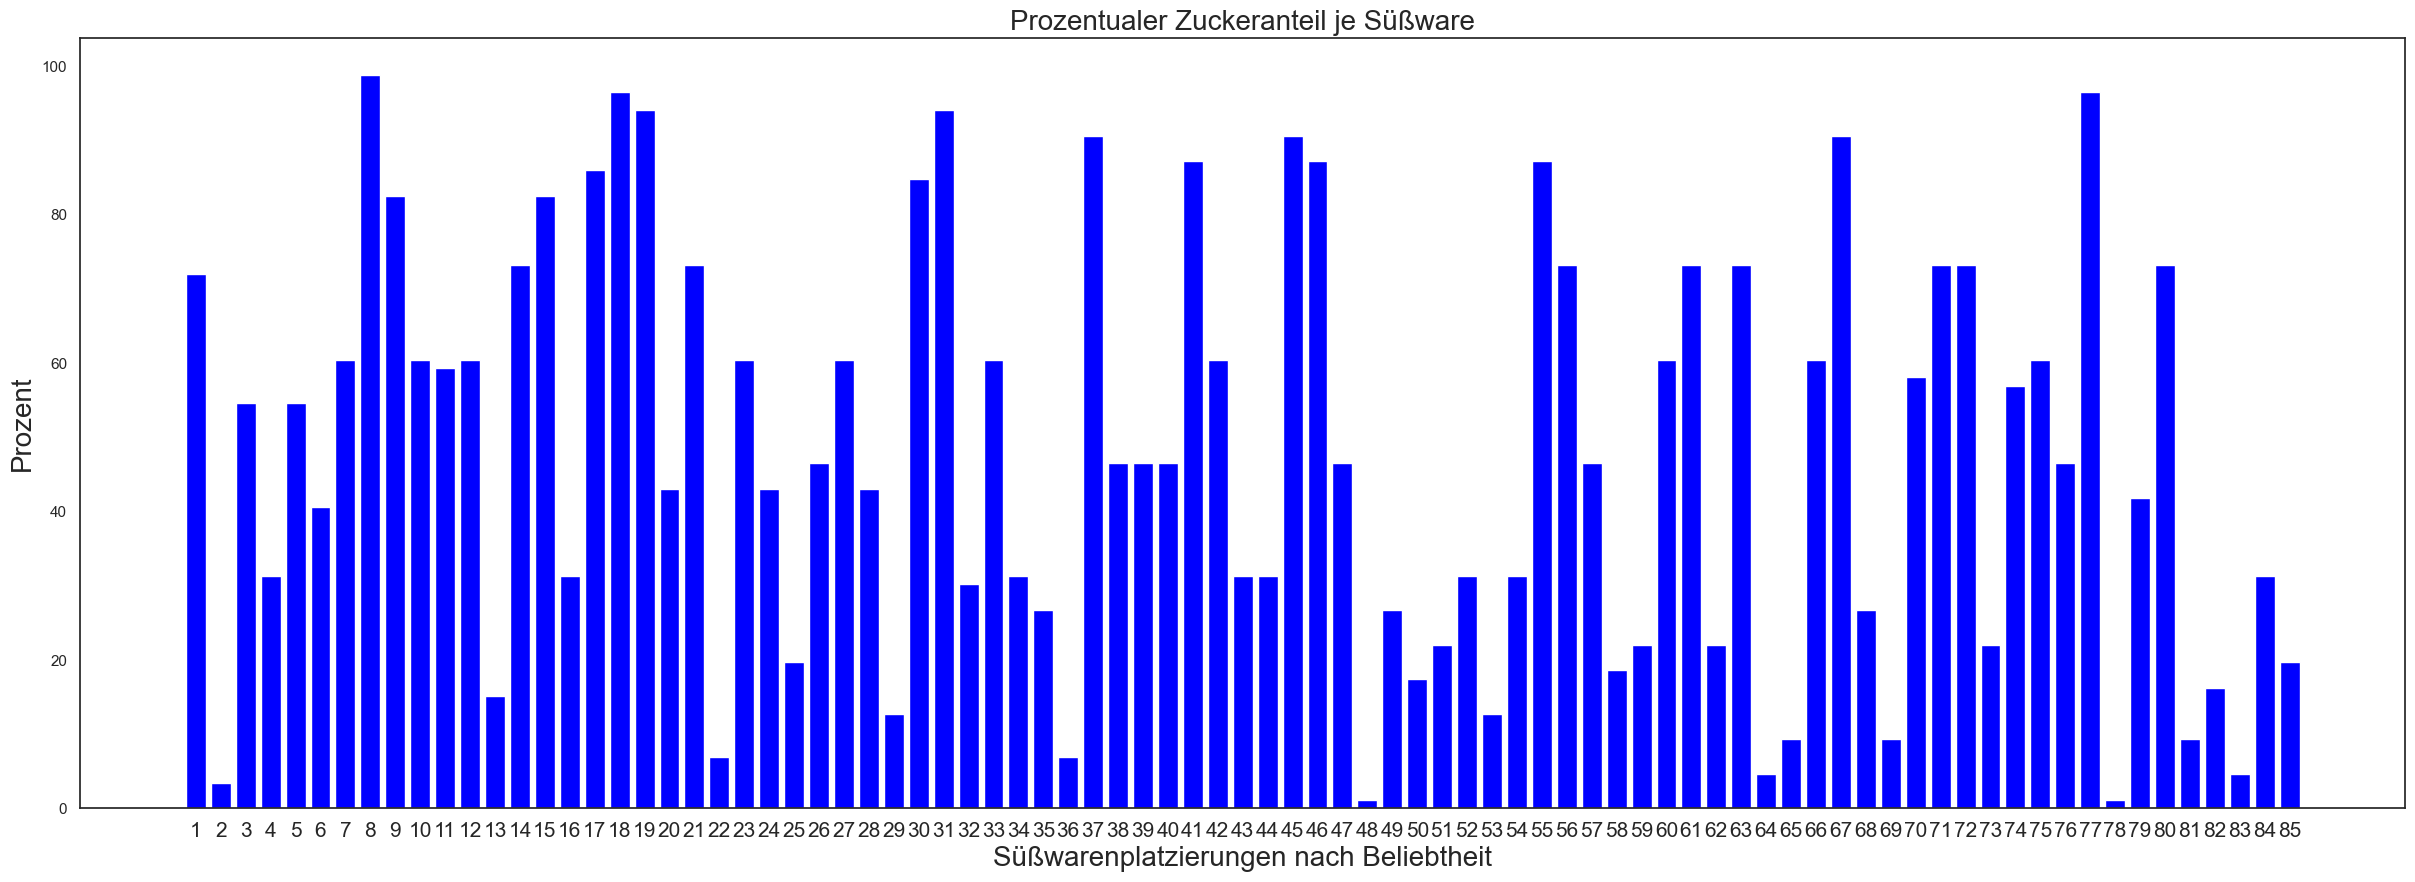

In [16]:
plt.bar(x=df.ranking, height=df.sugarpercent, color=taste_color[0])
plt.xticks(df.ranking, fontsize=15)
plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=20)
plt.ylabel("Prozent", fontsize=20)
plt.title("Prozentualer Zuckeranteil je Süßware", fontsize=20)
plt.show()

> $\Rightarrow$ Offensichtlich gibt es keine openzielle *"Ausreißer"* also **keine Süßigkeit die im vergleich zu den übrigen Süßigkeiten einen besonders hohen oder niedrigen Zuckeranteil besitzt**.

### 2.5.2 Durchschnittlicher Zuckeranteil in Gruppen

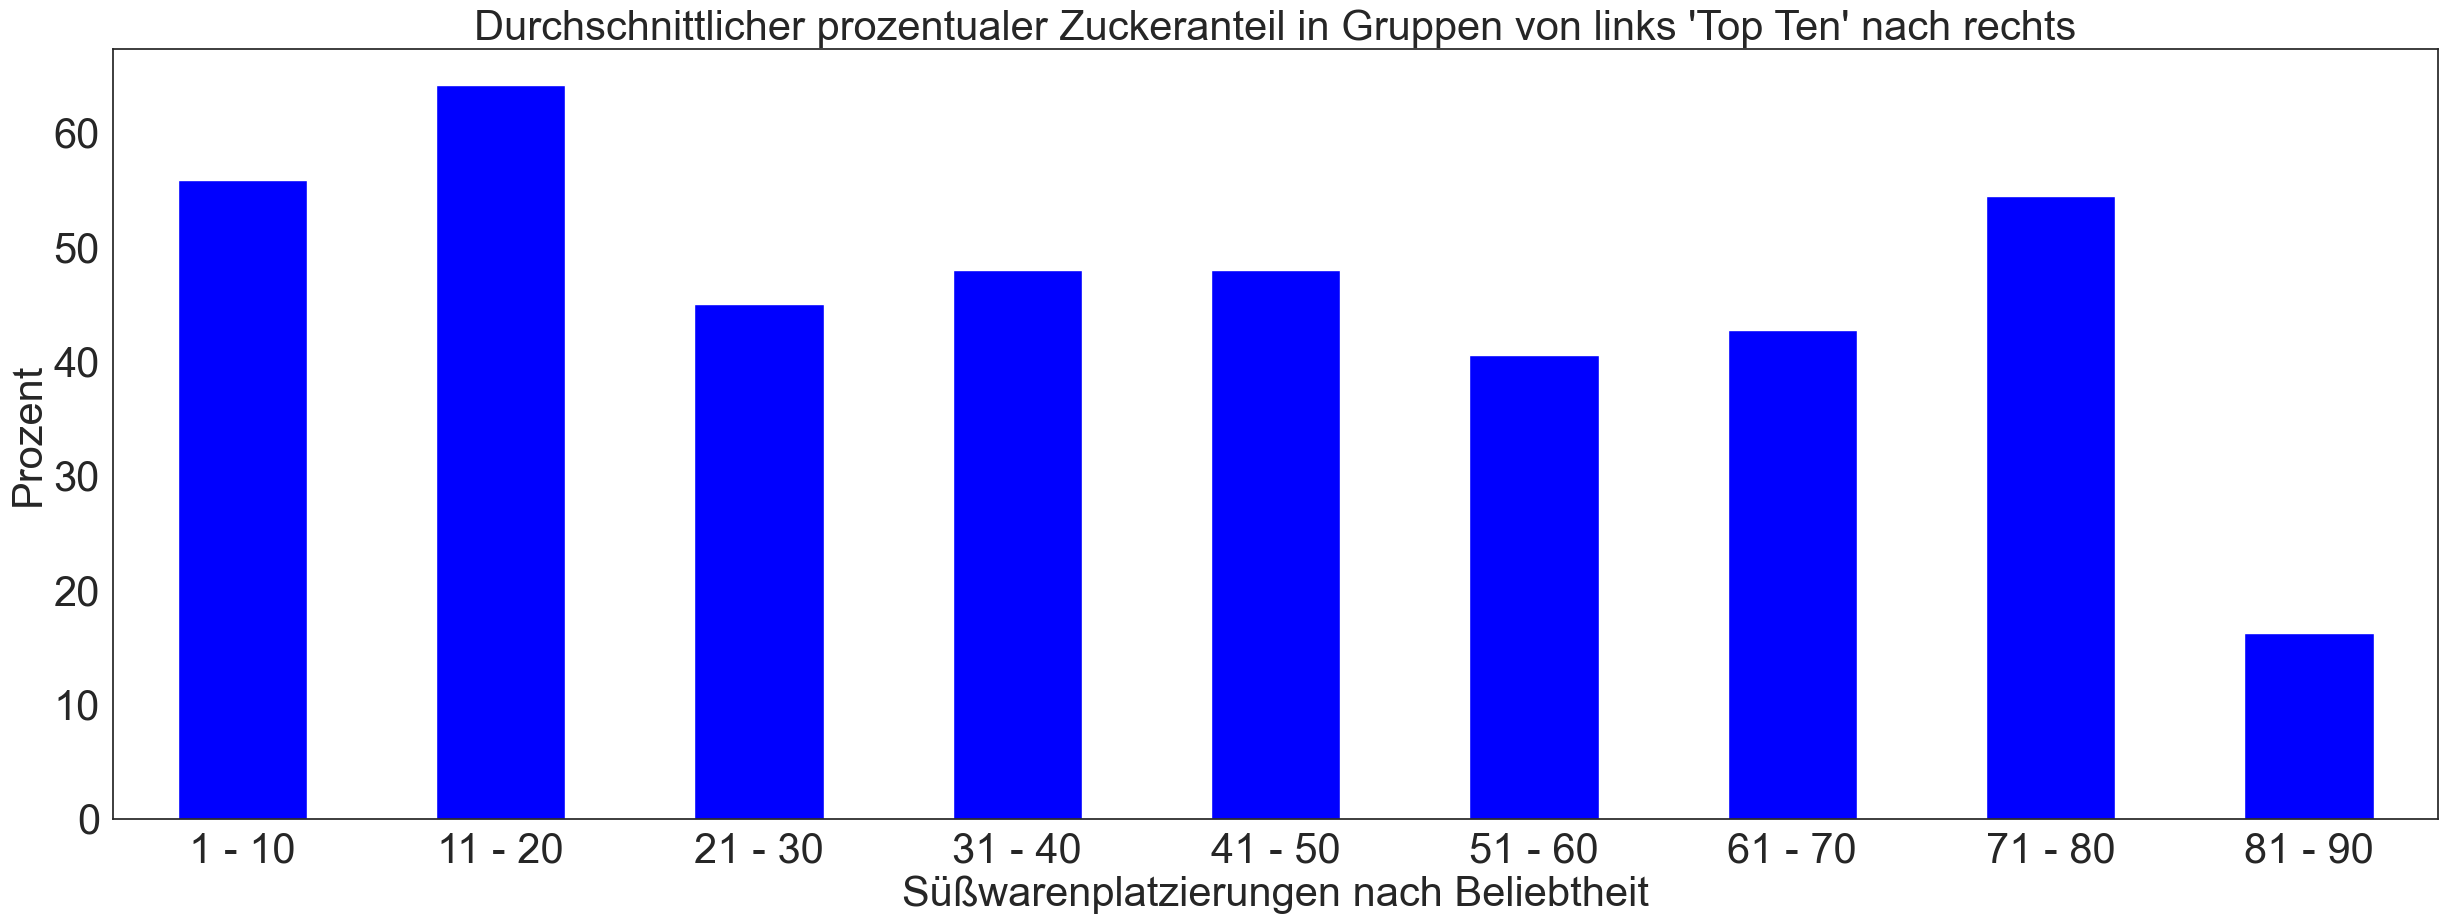

In [17]:
df_sugar_grouped = df['sugarpercent'].groupby(pd.cut(df['ranking'], bins)).mean()

df_sugar_grouped.plot(kind='bar', color=taste_color[0])
plt.xticks(range(0,9), xticks, rotation=0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=30)
plt.ylabel("Prozent", fontsize=30)
plt.title("Durchschnittlicher prozentualer Zuckeranteil in Gruppen von links 'Top Ten' nach rechts", fontsize=30)
plt.show()

> - $\Rightarrow$ Der prozentuale Zuckeranteil der ***Top 20*** scheint im Durchschnitt relativ hoch zu sein 
> - $\Rightarrow$ Eine detaillierter **Vergleich zwischen Beliebtheit und Zuckeranteil** wäre interessant

### 2.5.3 Analyse Vergleich Beliebheit und Zuckeranteil

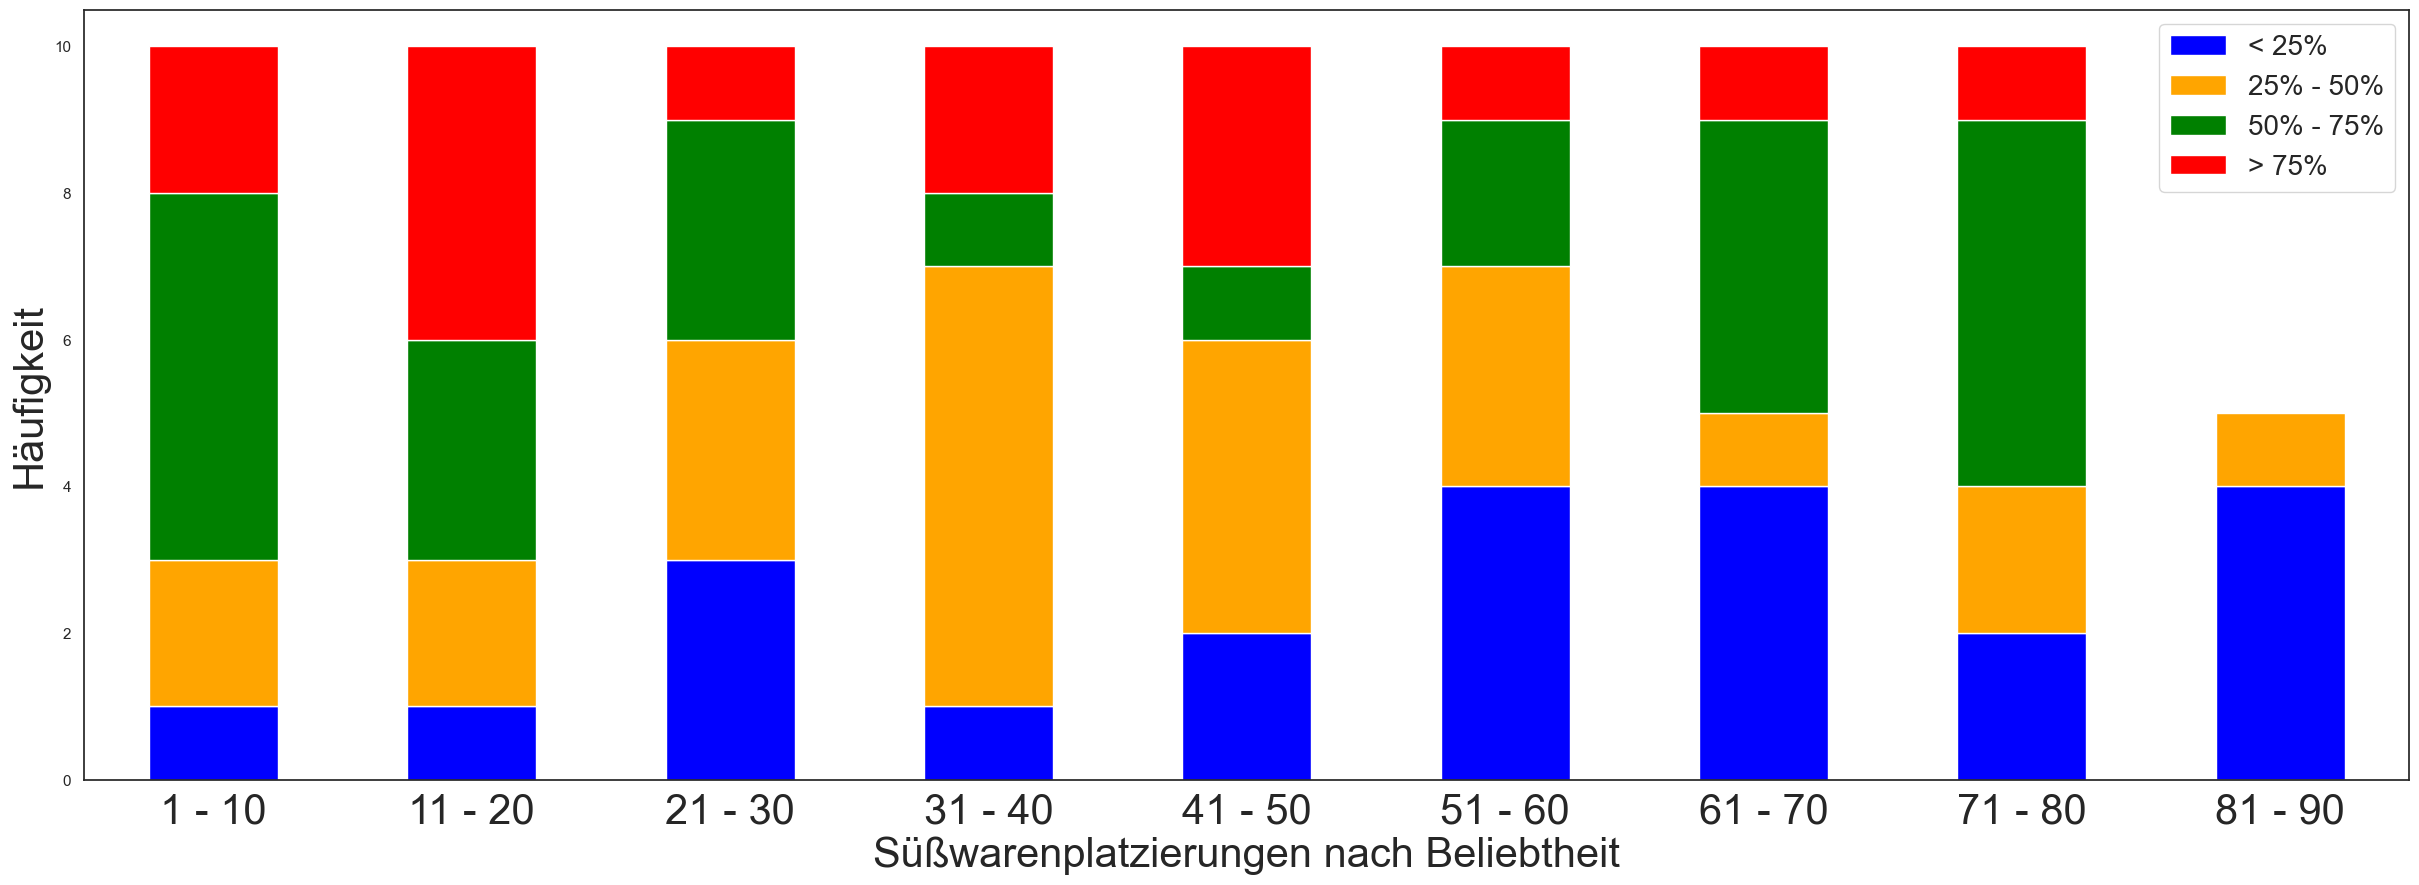

In [18]:
df_sugar_ranking = df['ranking'].groupby([pd.cut(df['ranking'], bins), pd.cut(df['sugarpercent'], [0,25,50,75,100])]).count()
df_sugar_ranking = df_sugar_ranking.unstack()

df_sugar_ranking.plot(kind='bar', stacked=True, color=taste_color[0:4])
plt.xticks(range(0,9), xticks, rotation=0, fontsize=30)
plt.xlabel("Süßwarenplatzierungen nach Beliebtheit", fontsize=30)
plt.ylabel("Häufigkeit", fontsize=30)
plt.legend(["< 25%", "25% - 50%", "50% - 75%", "> 75%"], fontsize=20)
plt.savefig('sugar.png', bbox_inches='tight')

> - $\Rightarrow$ Offensichtlich gibt es nur ***6 Süßwaren*** unter den ***Top 20*** die einen Zuckeranteil **unter 50%** haben. Dies erklärt auch den hohen durchschnittlichen Wert, denn die restlichen **14 Süßwaren** haben einen sehr **hohen Zuckeranteil**.

### 2.5.1 Verteilung und mögliche Ausreißer

Standardabweichung:  28.277787067790335


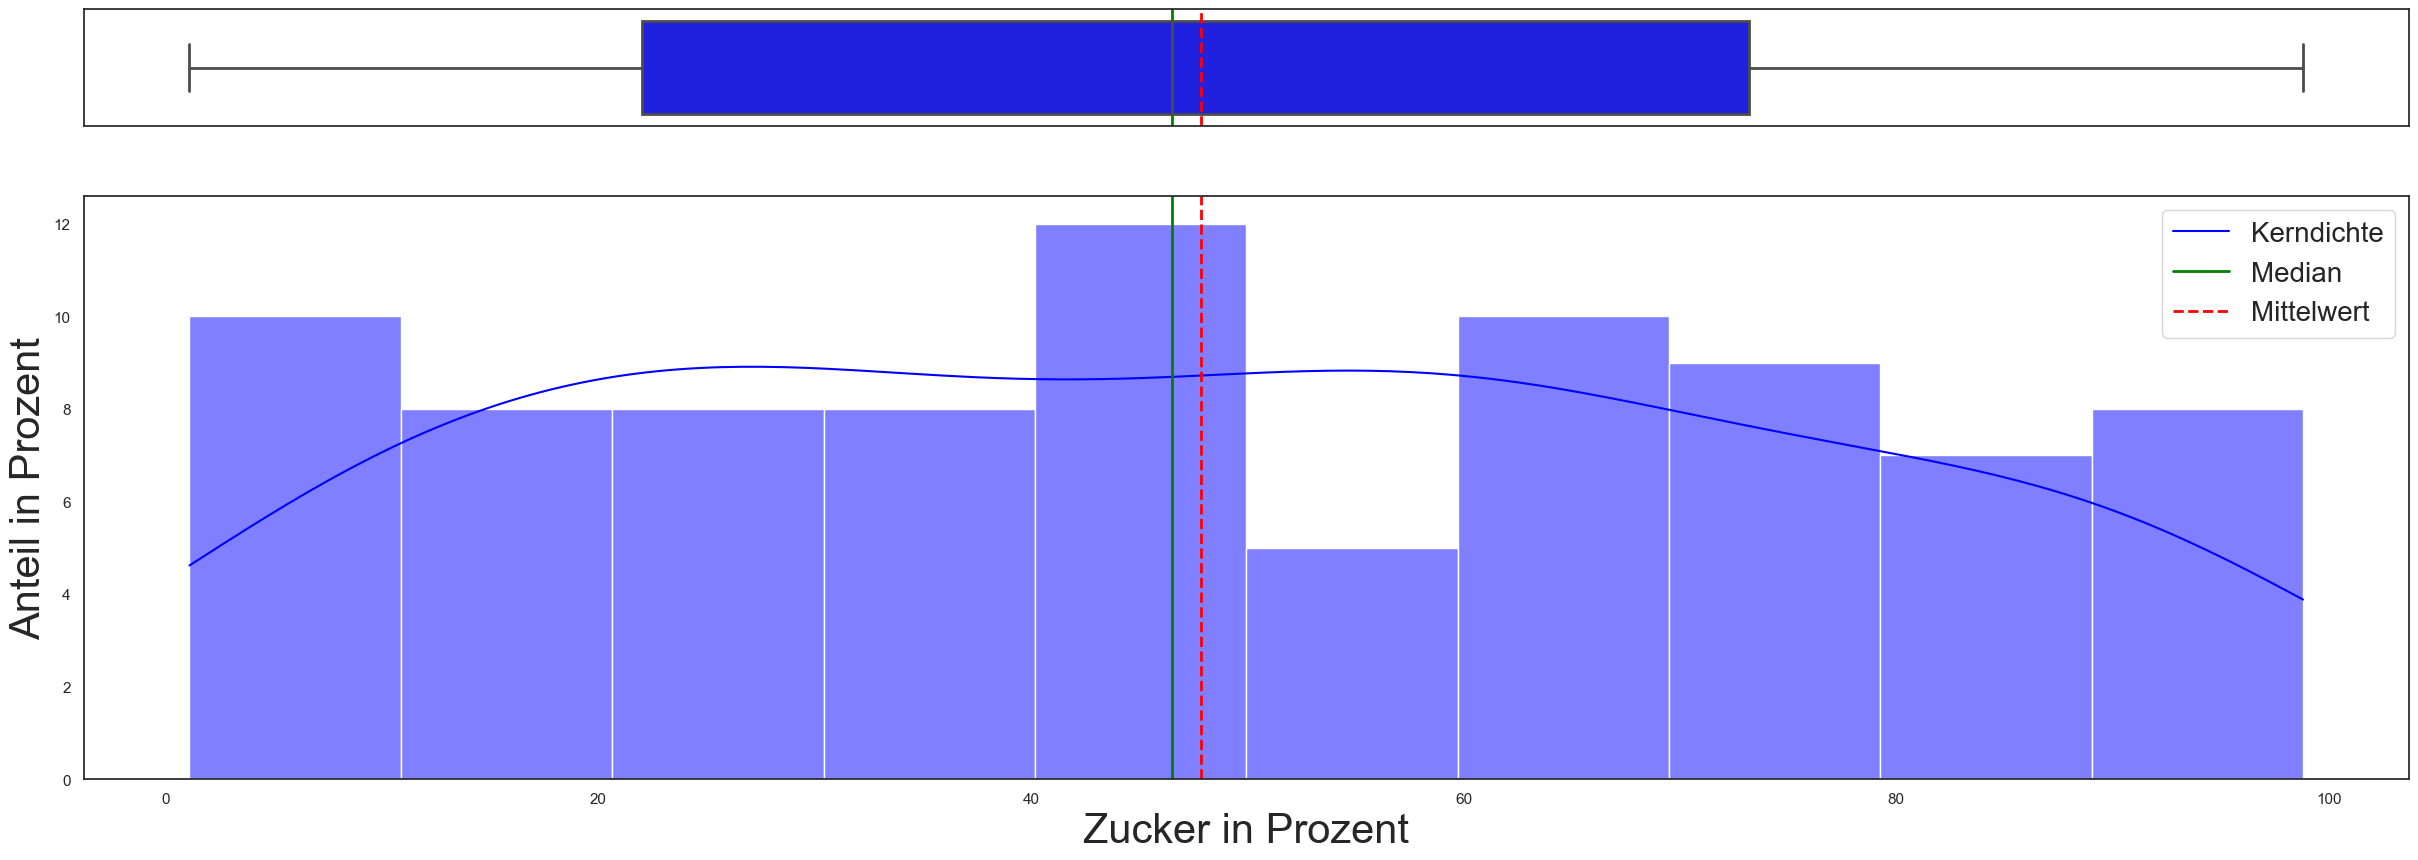

In [19]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['sugarpercent'].mean()
median=df['sugarpercent'].median()
print("Standardabweichung: ", df['sugarpercent'].std())

sns.boxplot(data=df, x='sugarpercent', ax=ax_box, color=taste_color[0], linewidth=2)
ax_box.axvline(median, color=taste_color[2], linestyle='-', linewidth=2)
ax_box.axvline(mean, color=taste_color[3], linestyle='--', linewidth=2)

sns.histplot(data=df, x='sugarpercent', ax=ax_hist, kde=True, color=taste_color[0], bins='sqrt')
ax_hist.axvline(median, color=taste_color[2], linestyle='-', linewidth=2)
ax_hist.axvline(mean, color=taste_color[3], linestyle='--', linewidth=2)

ax_hist.legend(["Kerndichte", "Median", "Mittelwert"], fontsize=20)
ax_hist.set_xlabel("Zucker in Prozent", fontsize=30)
ax_hist.set_ylabel("Anteil in Prozent", fontsize=30)

ax_box.set(xlabel=None)

plt.savefig('sugar_hist.png', bbox_inches='tight')

## 2.6 Analyse des prozentuale Stückpreises

Standardabweichung:  28.573961943317435


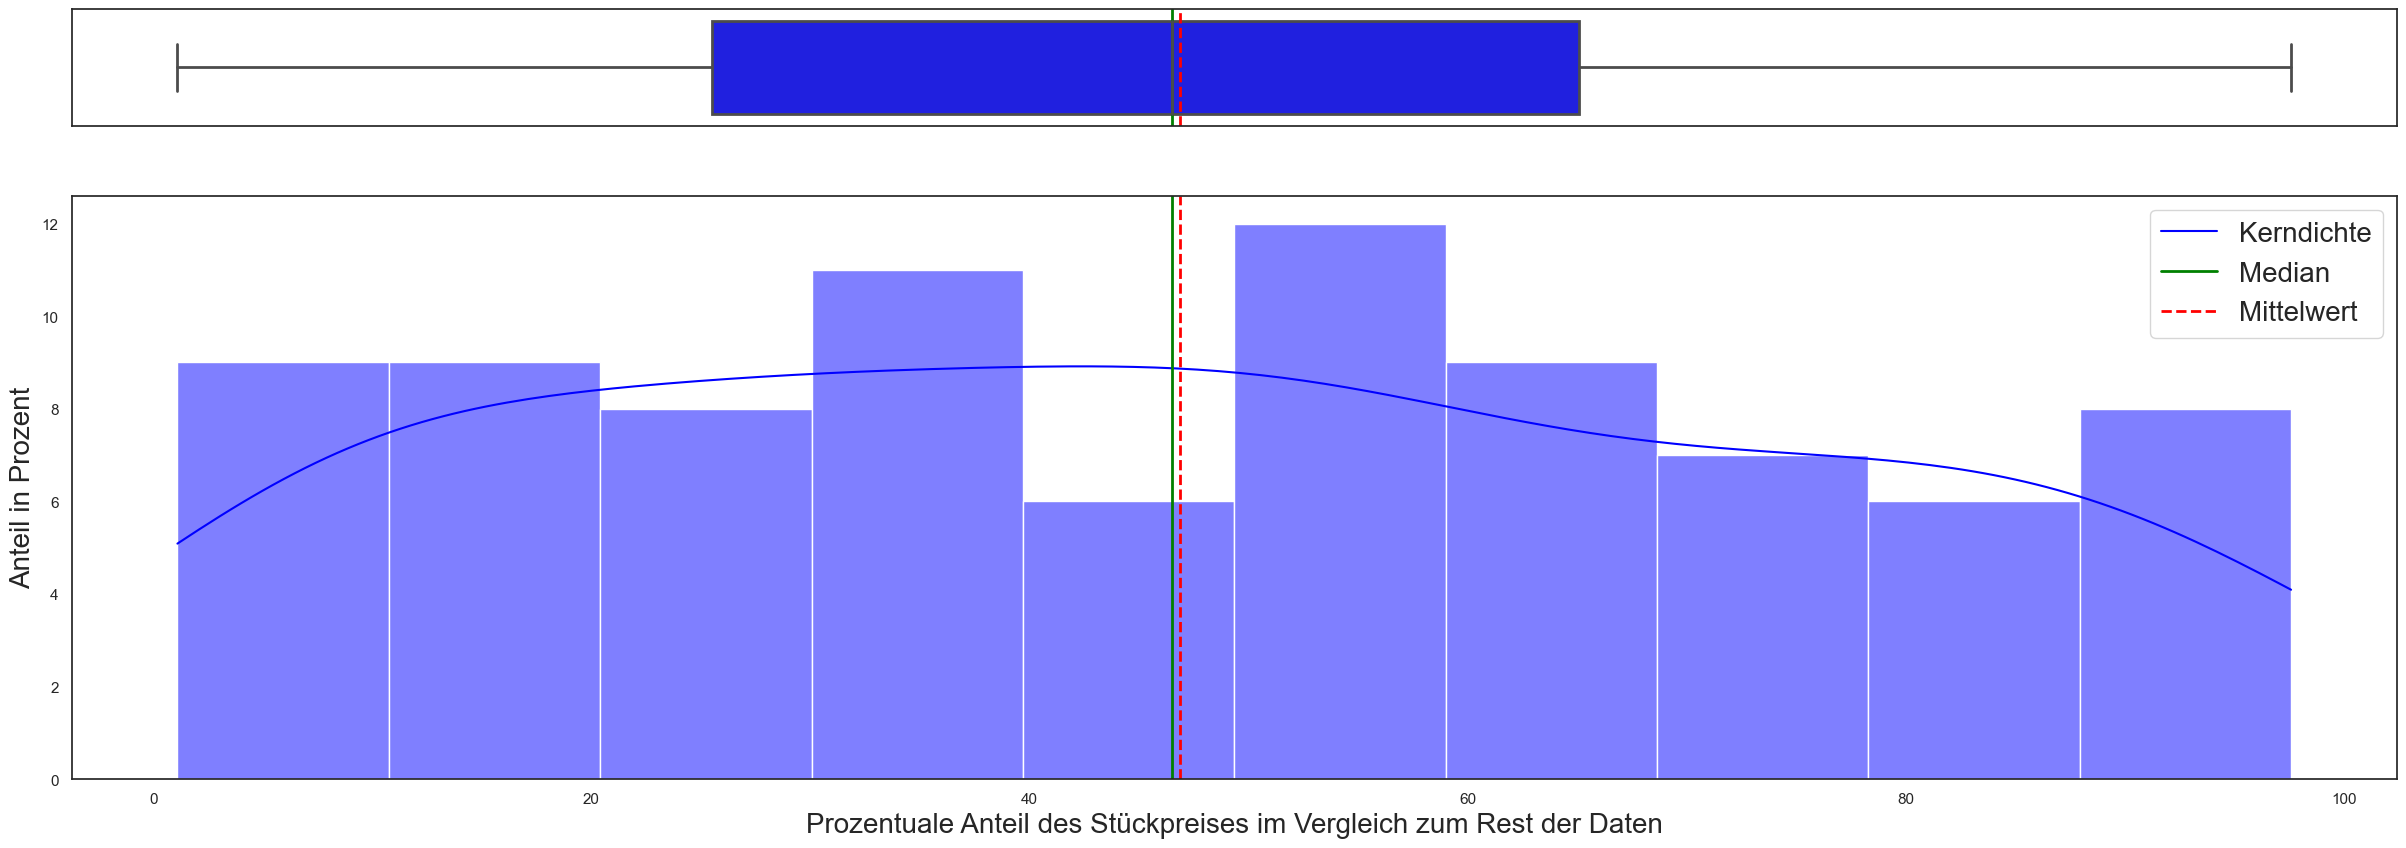

In [20]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['pricepercent'].mean()
median=df['pricepercent'].median()
print("Standardabweichung: ", df['pricepercent'].std())

sns.boxplot(data=df, x='pricepercent', ax=ax_box, color=taste_color[0], linewidth=2)
ax_box.axvline(median, color=taste_color[2], linestyle='-', linewidth=2)
ax_box.axvline(mean, color=taste_color[3], linestyle='--', linewidth=2)

sns.histplot(data=df, x='pricepercent', ax=ax_hist, kde=True, color=taste_color[0], bins='sqrt')
ax_hist.axvline(median, color=taste_color[2], linestyle='-', linewidth=2)
ax_hist.axvline(mean, color=taste_color[3], linestyle='--', linewidth=2)

ax_hist.legend(["Kerndichte", "Median", "Mittelwert"], fontsize=20)
ax_hist.set_xlabel("Prozentuale Anteil des Stückpreises im Vergleich zum Rest der Daten", fontsize=20)
ax_hist.set_ylabel("Anteil in Prozent", fontsize=20)

ax_box.set(xlabel=None)

plt.savefig('price_hist.png', bbox_inches='tight')

$\Rightarrow$ Offensichtlich gibt es **keine Ausreißer sowohl beim  Zuckeranteil als auch beim Stückpreis**. Des Weiteren zeigen die beiden **Histogramme, das sich der prozentuale Zuckeranteil sowie prozentuale Stückpreis über die volle Breite erstreckt**.

## 2.7 Wichtige Variablen für Präsentation

In [21]:
print(f"Anzahl Riegel gesamt: {df[df['bar'] == 1].shape[0]}")

Anzahl Riegel gesamt: 21


In [22]:
print(f"Anzahl Schokoladenriegel: {df[(df['bar'] == 1) & (df['chocolate'] == 1)].shape[0]}")

Anzahl Schokoladenriegel: 20


In [23]:
print(f"Anzahl Riegel mit Nougat: {df[(df['bar'] == 1) & (df['nougat'] == 1)].shape[0]}")

Anzahl Riegel mit Nougat: 7


### 2.7.1 Beliebte Süßwaren mit wenig Zucker

In [24]:
df_low_sugar = df[(df['ranking'] <= 20) & (df['sugarpercent'] <=50)]
print(f"Häufigkiet der Inhaltstoffe in den 'Low-Sugar-Süßwaren': \n{df_low_sugar[taste_cols].sum()}")

Häufigkiet der Inhaltstoffe in den 'Low-Sugar-Süßwaren': 
chocolate           5
fruity              1
caramel             0
peanutyalmondy      2
nougat              0
crispedricewafer    3
dtype: int64


In [25]:
print(f"Häufigkiet der Form/Gestalt in den 'Low-Sugar-Süßwaren': \n{df_low_sugar[shape_cols].sum()}")

Häufigkiet der Form/Gestalt in den 'Low-Sugar-Süßwaren': 
hard        0
bar         3
pluribus    2
dtype: int64
